In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
def chi2(curva_teorica, valores, nbins=150):
    """Calcula o Chi2 entre a curva teórica e os valores medidos
    
    Parameters
    ----------
    curva_teorica
        Objeto do Scipy.stats que representa a curva teórica
    valores: list like
        Array contendo os valores medidos
    nbins: int, default=150
        Número de bins do histograma

    Returns
    -------
    chi2: float
        chi2 entre os valores medidos e a curva teórica
    """
    interval = np.linspace(min(valores), max(valores), nbins)
    hist, bins = np.histogram(valores, bins=interval)
    
    prob_acumulada = curva_teorica.cdf(interval)

    area_bins = prob_acumulada[1:] - prob_acumulada[:-1]
    frequencia_teorica = area_bins * len(valores)

    chi_amostra = np.sum((frequencia_teorica - hist)**2/(frequencia_teorica+10**-10))
    return chi_amostra

def teste_chi2(chi2_amostra: float, n_params: int, nbins=150, intervalo_confianca=0.95):
    """Faz o teste de chi2
    
    Parameters
    ----------
    chi2_amostra: float
        Chi² a ser testado
    n_params: int
        Número de parametros utilizados
    n_bins: int
        Quantidade de dados do ajuste
    intervalo_confiaca: float
        Intervalo de confiança
    """
    chi2_critico = stats.chi2.ppf(0.95,df=nbins-1-n_params)
    if chi2_amostra > chi2_critico:
        print(f'Hipótese nula rejeitada pois chi_amostra ({chi2_amostra}) > chi_critico ({chi2_critico})')
    else:
        print(f'Hipótese nula não rejeitada pois chi_amostra ({chi2_amostra}) < chi_critico ({chi2_critico})')

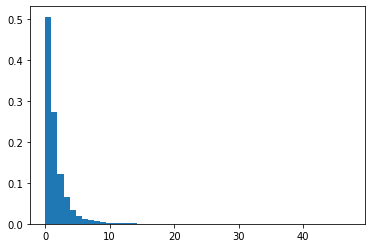

In [3]:
# Carregando os dados
valores = np.load('values_squad4.npy')
plt.hist(valores,bins=50, density=True); 

In [4]:
# Cálculo da média e desvio padrão da AMOSTRA
media = np.mean(valores)
std = np.std(valores)

In [9]:
# Curva Exponencial
curva_expon = stats.expon(loc=media, scale=std)
chi2_expon = chi2(curva_teorica=curva_expon, valores=valores, nbins=15)
teste_chi2(chi2_expon, 2, nbins=15)

Hipótese nula rejeitada pois chi_amostra (61055.17713537735) > chi_critico (21.02606981748307)


In [77]:
# Curva Gamma
curva_gamma = stats.gamma(a=1)
chi2_gamma = chi2(curva_teorica=curva_gamma, valores=valores, nbins=15)
teste_chi2(chi2_gamma, 1, nbins=15)

Hipótese nula rejeitada pois chi_amostra (27471716260.05182) > chi_critico (22.362032494826934)


In [41]:
# Curva Log Normal
curva_lognorm = stats.lognorm(s=np.std(np.log(valores)))
chi2_lognorm = chi2(curva_teorica=curva_lognorm, valores=valores, nbins=15)
teste_chi2(chi2_lognorm, 1, nbins=15)

Hipótese nula não rejeitada pois chi_amostra (8.301659206136893) < chi_critico (22.362032494826934)


In [12]:
# Curva Normal
curva_norm = stats.norm(loc = media, scale=std)
chi2_norm = chi2(curva_teorica=curva_norm, valores=valores, nbins=15)
teste_chi2(chi2_norm, 2, nbins=15)

Hipótese nula rejeitada pois chi_amostra (1709661416003.334) > chi_critico (21.02606981748307)


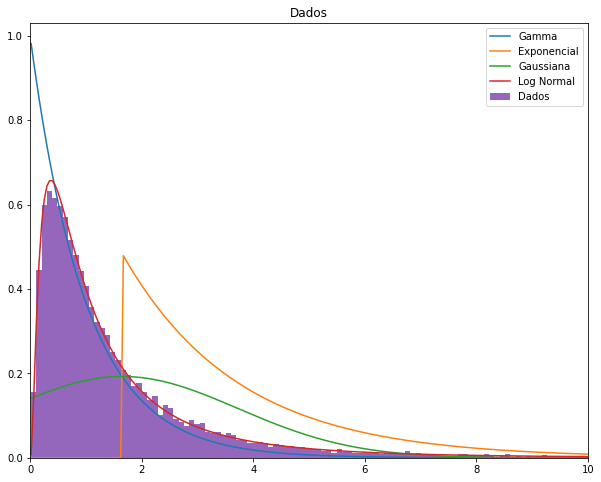

In [81]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
x = np.linspace(min(valores), max(valores), 1000)
y_lognorm = curva_lognorm.pdf(x)
y_norm = curva_norm.pdf(x)
y_expon = curva_expon.pdf(x)
y_gamma = curva_gamma.pdf(x)
ax.plot(x, y_gamma, label="Gamma")
ax.plot(x, y_expon, label="Exponencial")
ax.plot(x, y_norm, label="Gaussiana")
ax.plot(x, y_lognorm, label="Log Normal")
ax.hist(valores, bins=500, density=True, label="Dados")
ax.set_xlim(0, 10)
ax.set_title("Dados")
plt.legend(loc="best")
plt.show()